In [1]:
import numpy as np
import matplotlib.pylab as plt

- [Scipy FFT tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html)

### Correlate2d vs convolve2d

    def correlate2d(in1, in2, mode='full', boundary='fill', fillvalue=0):
        out = sigtools._convolve2d(in1, in2.conj(), ...
    # https://github.com/scipy/scipy/blob/adc4f4f7bab120ccfab9383aba272954a0a12fb0/scipy/signal/signaltools.py#L1552-L1644
    
    def convolve2d(in1, in2, mode='full', boundary='fill', fillvalue=0):
        out = sigtools._convolve2d(in1, in2, 1, val, bval, fillvalue)
        
        
both calls `sigtools._convolve2d` 

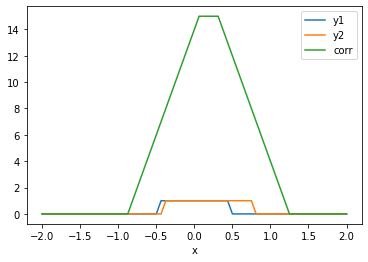

In [299]:
## =================
##  1D convolution 
## =================
from scipy.signal import fftconvolve

x = np.linspace(-2, 2, 65)

y1 = np.zeros_like(x)
y1[ np.abs(x)<0.5 ] = 1

y2 = np.zeros_like(x)
y2[ np.abs(x-0.2)<0.6 ] = 1

corr = fftconvolve(y1, y2, mode='same')

plt.plot(x, y1, label='y1');
plt.plot(x, y2, label='y2');
plt.plot(x, corr, label='corr');
plt.legend(); plt.xlabel('x');

Guizar-Sicairos, Manuel, Samuel T. Thurman, et James R. Fienup. « Efficient Subpixel Image Registration Algorithms ». Optics Letters 33, nᵒ 2 (15 janvier 2008): 156. https://doi.org/10.1364/OL.33.000156.

    The usual FFT approach to finding the cross-correlation peak to within a fraction, 1 / ␬ , of a pixel is
    (i) compute F共u , v兲 and G共u , v兲, (ii) embed the product
    F共u , v兲G * 共u , v兲 in a larger array of zeros of dimen-
    sions 共 ␬ M , ␬ N兲, (iii) compute an inverse FFT to ob-
    tain an upsampled cross correlation, and (iv) locate
    its peak. The computational complexity of the inverse
    FFT in this case is O兵MN ␬ 关log 2 共 ␬ M兲 + ␬ log 2 共 ␬ N兲兴其 for
    N 艋 M.

In [120]:
from scipy.fft import fft, ifft, fftshift, ifftshift

argmax= -2


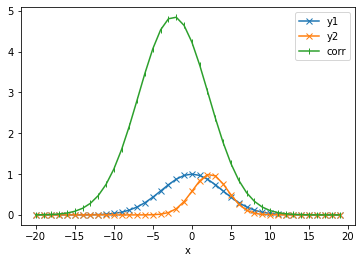

In [390]:
x = np.arange(-20, 20, 1)

y1 = np.exp( -(x)**2 / 30 ) 
y2 = np.exp( -(x - 2.345678)**2 / 10 ) #+ 0.1*np.random.randn(len(x))

y1_TF = (fft(y1))
y2_TF = (fft(y2))

corr_TF = y1_TF * y2_TF.conj()
corr = ifft(corr_TF)
corr = fftshift(corr)
corr = np.abs(corr)

plt.plot(x, y1, 'x-', label='y1');
plt.plot(x, y2, 'x-', label='y2');
plt.plot(x, corr, '|-', label='corr');
plt.legend(); plt.xlabel('x');

print('argmax=', x[np.argmax(corr)])

In [414]:
up_sample_factor = 100
shifted_corr_TF = fftshift(corr_TF)
padded_corr_TF = np.pad(shifted_corr_TF, (0, 1+len(shifted_corr_TF)*(up_sample_factor-1)))
upsampled_corr = ifft(padded_corr_TF)
upsampled_corr = fftshift(upsampled_corr)
upsampled_corr = np.abs(upsampled_corr)

x_up = np.linspace(x.min(), x.max(), len(upsampled_corr))

argmax= -2
up-sampled argmax= -2.7912500000000016


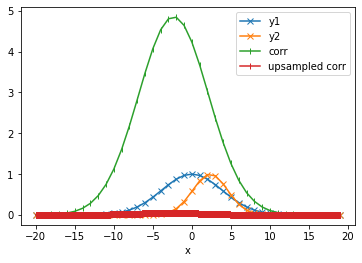

In [415]:
plt.plot(x, y1, 'x-', label='y1');
plt.plot(x, y2, 'x-', label='y2');
plt.plot(x, corr, '|-', label='corr');
plt.plot(x_up, upsampled_corr, '|-', label='upsampled corr');
plt.legend(); plt.xlabel('x');

print('argmax=', x[np.argmax(corr)])
print('up-sampled argmax=', x_up[np.argmax(upsampled_corr)])

In [403]:
from skimage.registration import phase_cross_correlation

In [411]:
phase_cross_correlation(y1.reshape(len(y1), 1), y2.reshape(len(y2), 1),
                        upsample_factor=10000)

(array([-2.3457,  0.    ]), 0.366025403812553, 4.469034646434297e-18)

In [363]:
len(padded_corr_TF)

60

argmax= -0.49902495124756285


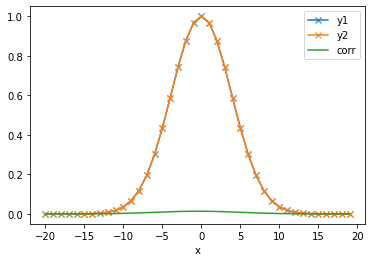

In [298]:
up_sample_factor = 500
x = np.arange(-20, 20, 1)

y1 = np.exp( -(x)**2 / 30 )
y2 = np.exp( -(x - 0.0000000000000000345678)**2 / 30 )

y1_TF = fft(y1)
y2_TF = fft(y2)

corr_TF = y1_TF * y2_TF.conj()
corr_TF = ifftshift(corr_TF)

corr = ifft(corr_TF, n=up_sample_factor*len(corr_TF))
corr = ifftshift(corr)
corr = np.abs(corr)

x_up_sampled = np.linspace(x.min(), x.max(), len(corr))

plt.plot(x, y1, 'x-', label='y1');
plt.plot(x, y2, 'x-', label='y2');
plt.plot(x_up_sampled, corr, '-', label='corr');
plt.legend(); plt.xlabel('x');

print('argmax=', x_up_sampled[np.argmax(corr)])

In [ ]:
corr_TF = y1_TF * y2_TF.conj()
corr = ifft(corr_TF)
corr = fftshift(corr)
corr = np.abs(corr)

plt.plot(x, y1, 'x-', label='y1');
plt.plot(x, y2, 'x-', label='y2');
plt.plot(x, corr, '|-', label='corr');
plt.legend(); plt.xlabel('x');

print('argmax=', x[np.argmax(corr)])

zero-padding
http://greg-ashton.physics.monash.edu/example-of-zero-padding-using-scipy.html

2.0


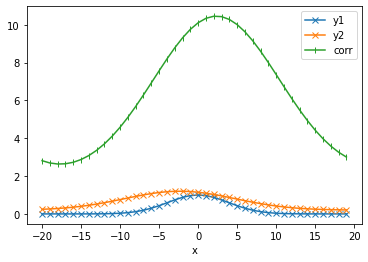

In [247]:
up_sample_factor = 100
y1_TF = fft(y1)#, n=up_sample_factor*len(y1))
y2_TF = fft(y2)#, n=up_sample_factor*len(y2))

corr_TF = y1_TF * y2_TF.conj()

corr_TF_normed = corr_TF / np.abs(corr_TF)
#corr_TF = corr_TF_normed

corr = ifft(corr_TF)
corr = fftshift(corr)
corr = np.abs(corr)

x_fine = np.linspace(np.min(x), np.max(x), len(corr))

plt.plot(x, y1, 'x-', label='y1');
plt.plot(x, y2, 'x-', label='y2');
plt.plot(x_fine, corr, '|-', label='corr');
plt.legend(); plt.xlabel('x');

print(x_fine[np.argmax(corr)])

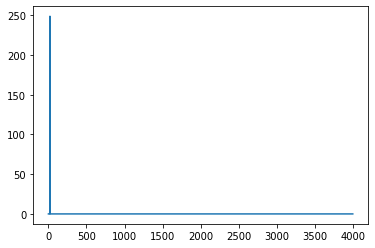

In [243]:
#corr_TF_centered = fftshift(corr_TF)
corr_TF_pad = np.zeros(up_sample_factor*len(corr_TF), dtype='complex128')
corr_TF_pad[:len(corr_TF)] = corr_TF_centered

plt.plot(np.abs(corr_TF_pad))

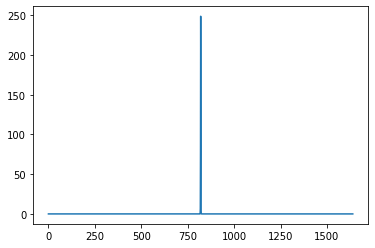

In [240]:
corr_TF_centered = fftshift(corr_TF)
corr_TF_pad = np.pad(corr_TF_centered, up_sample_factor*len(corr_TF_centered))
plt.plot(np.abs(corr_TF_pad))

1.7962172056131784


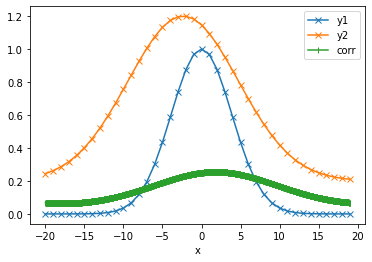

In [241]:
corr = ifft(corr_TF_pad)
corr = fftshift(corr)
corr = np.abs(corr)

x_fine = np.linspace(np.min(x), np.max(x), len(corr))

plt.plot(x, y1, 'x-', label='y1');
plt.plot(x, y2, 'x-', label='y2');
plt.plot(x_fine, corr, '|-', label='corr');
plt.legend(); plt.xlabel('x');

print(x_fine[np.argmax(corr)])